In [1]:
##BUILDING AN STRUCTURE FOR RELIABLE, CLEAR AND REPRODUCIBLE EDA

#Objectives:
#1. Generate a pipeline of techniques for analyzing and getting the best dataset possible for modeling stage
#2. Learn and incorporate all techniques I can find 

In [2]:
##Summary of the project:
##- This project is intended for the Kaggle Titanic Competition
##- I will be working with both train and test datasets provided by Kaggle


In [3]:
##Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
%matplotlib inline

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 350)
pd.set_option('display.max_colwidth', -1) 
pd.set_option("display.max_rows", 500)
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker


# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import StandardScaler


from sklearn.compose import make_column_transformer


import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit, Lasso, LassoLarsIC, ElasticNet, ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel
from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import norm, kurtosis, skew

# Import specific libraries
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA, KernelPCA
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit, Lasso, LassoLarsIC, ElasticNet, ElasticNetCV
from sklearn.linear_model import SGDRegressor, PassiveAggressiveRegressor, HuberRegressor, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
import mlxtend
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
import lightgbm as lgb
# Models
import mlxtend
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from patsy import dmatrices

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p
from patsy import dmatrices

pd.set_option('expand_frame_repr', False)

#For baseline estimations
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score


#For importing from my own libraries in src :)
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)
    
from house_utils import data_summary, features_profile, plot_feats



###TO PREVENT SCROLLING : SHIFT + O

In [4]:
#Reading the datasets

train = pd.read_csv("../input/train.csv")
test= pd.read_csv("../input/test.csv")

#Save the index of each dataset
train_ID = train.PassengerId.values
test_ID = test.PassengerId.values

#Concatenate all in one file
test["Survived"] = -1 #create a target column for kkeping the shape of concatenated dataset
test = test[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']] #we set new column in the appropriate order
df = pd.concat([train, test], axis = 0).reset_index(drop = True)


In [5]:
#Variable identificacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [6]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0000,1,0,237736,30.0708,NaN,C


In [7]:
#Classification of each feature
#PassengerId: numerical-discrete
#Survived: numerical-discrete (target)
#Pclass:  numerical-discrete
#Sex: categorical - nominal
#Age: numerical - continuous (there are enfants with 0.4 years)
#Name: categorical- nominal
#SibSp:  numerical-discrete
#Parch:  numerical-discrete
#Ticket: categorical- nominal
#Fare: numerical - continuous
#Cabin: categorical- nominal
#Embarked: categorical- nominal

#Summary:
num_discrete = ['PassengerId', 'Survived', 'Pclass', 'SibSp',
       'Parch']
num_continuous = ['Age',  'Fare']
categ_nominal = ['Sex', "Name",'Ticket', 'Cabin', 'Embarked']

In [8]:
new_feats = df.copy() ##guardar para crear new features
new_feats.Ticket = df.Ticket

In [9]:
#Summary of numerical features (train dataset)
data_summary(df = train.select_dtypes(include = "number"), target = "Survived")

,Dtype,Uniques,Nulls,% Nulls,Skew,Kurtosis,Correlation
Survived,int64,2,0,0.0000,0.4790,-1.7750,1.0000
Pclass,int64,3,0,0.0000,-0.6310,-1.2800,-0.3380
Fare,float64,248,0,0.0000,4.7870,33.3980,0.2570
Parch,int64,7,0,0.0000,2.7490,9.7780,0.0820
Age,float64,88,177,0.2000,0.3890,0.1780,-0.0770
SibSp,int64,7,0,0.0000,3.6950,17.8800,-0.0350
PassengerId,int64,891,0,0.0000,0.0000,-1.2000,-0.0050


In [10]:
##Summary:
#Pclass and Fare as the most correlated features with Target
#Fare has a huge Kurtosis and skew, so it must me processed.
#Fare must have a significant amount of outliers to be analyzed
#Parch and SibSp also must be transformed

In [11]:
#Statistical summary of dataset (using train dataset)
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [12]:
#Observations:
#- Only 38,4% of people survived
#There are remarkable high values in the 3rd quantile of Fare to look into
#75% of passengers declared without Parch
#75% of passengers were 38 years old or less
#There are different scales in the numerical data, so they will have to be rescaled later for modeling stage

In [13]:
#ANALYSIS OF NULLS
def nulls_summary(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent_1 = df.isnull().sum()/df.isnull().count()*100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    return missing_data[missing_data["Total"] != 0]

nulls_summary(df)

,Total,%
Cabin,1014,77.5000
Age,263,20.1000
Embarked,2,0.2000
Fare,1,0.1000


In [14]:
#Summary of nulls:

#We have 4 features with nulls: Age, fare, Cabin and Embarked
#Cabin has a huge % of nulls, so we could consider dropping it
#Embarked and fare have just 2 and 1 respectively, so we can deal with that
#Age has 263, and we shall investigate how to deal with it

In [15]:
##UNIVARIATE VISUAL ANALYSIS:
#Check tha distribution of each feature and draw useful information
#We will use the separation we made (continuous, discrete, categorical) to plot accodingly 

#Points to check:

#Cómo es la forma de la distribucion? #es una distribucion simetrica?
#"The shape of the distribution is a fundamental characteristic of your sample
#that can determine which measure of central tendency best reflects the center of your data".
#Also the shape also impacts your choice between using a parametric or nonparametric hypothesis test.
#Cuál es el valor más típico
#Lo datos estàn dispersos o no?
#Si no, cómo es?
#El promedio estará alterado por la presencia de outliers , como acá

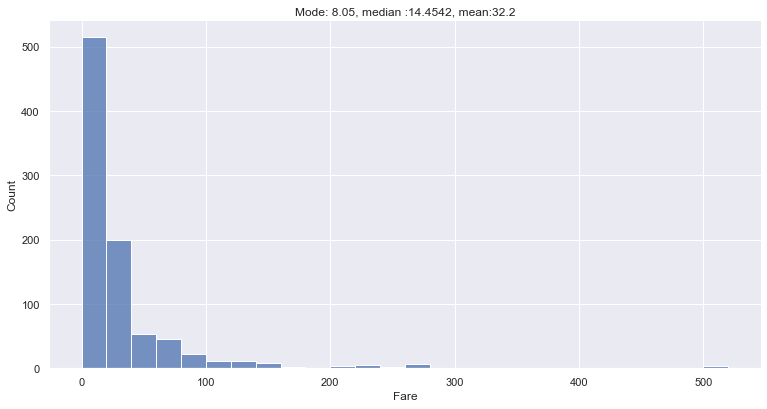

In [16]:
#1. CONTINUOUS FEATURES
#For continuous data we must use the histogram

#FARE
g = sns.displot(train.Fare, bins = 25,  binwidth=20)
g.fig.set_figwidth(12)
g.fig.set_figheight(5.7)
plt.title("Mode: {}, median :{}, mean:{}".format(train.Fare.mode()[0], train.Fare.median(), np.round(train.Fare.mean(),2)))
plt.show()
    

In [17]:
#Cómo es la forma de la distribucion? #es una distribucion simetrica? No es simétrica, right-skewed
#"The shape of the distribution is a fundamental characteristic of your sample
#that can determine which measure of central tendency best reflects the center of your data".
#Also the shape also impacts your choice between using a parametric or nonparametric hypothesis test.
#Cuál es el valor más típico: mode: 8.05
#Lo datos estàn dispersos o no?: Existen outliers evidentes en el extremo derecho, que tiran el promedio hacia arriba
#Si no, cómo es?
#El promedio estará alterado por la presencia de outliers , como acá

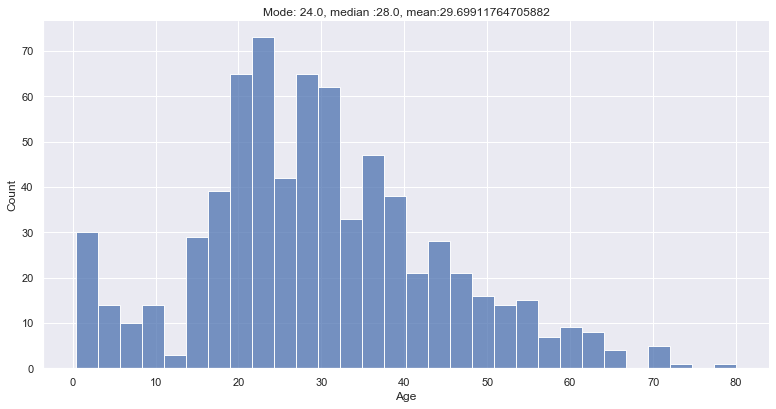

In [18]:

#AGE
g = sns.displot(train, x= "Age", bins = 30)
g.fig.set_figwidth(12)
g.fig.set_figheight(5.7)
plt.title("Mode: {}, median :{}, mean:{}".format(train.Age.mode()[0], train.Age.median(), train.Age.mean()))
plt.show()


In [19]:
#Cómo es la forma de la distribucion? #es una distribucion simetrica?: Es simétrica, con un peak a la izquierda a analizar
#y además right skewed con algunos valores altos (alrededor de 80)
#"The shape of the distribution is a fundamental characteristic of your sample
#that can determine which measure of central tendency best reflects the center of your data".
#Also the shape also impacts your choice between using a parametric or nonparametric hypothesis test.
#Cuál es el valor más típico: Mode = 24 años
#Lo datos estàn dispersos o no?: Hay dispersión hacia la derecha, pero en gral se ve simétrica
#Si no, cómo es?
#El promedio estará alterado por la presencia de los outliers , como acá

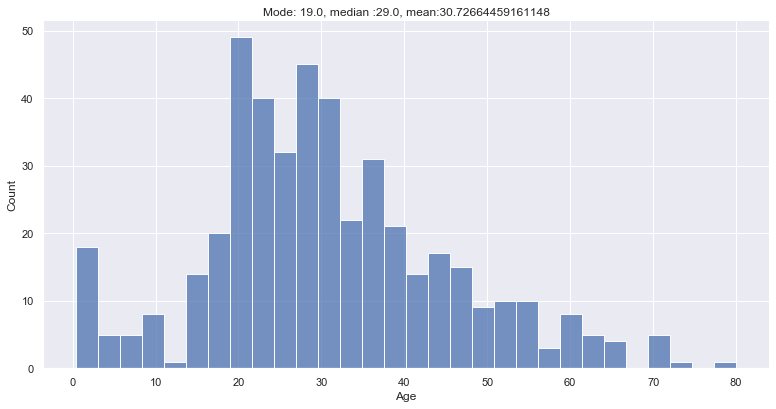

In [20]:
#Age and Sex: male
t = train[train.Sex == "male"]
g = sns.displot(train[train.Sex == "male"], x= "Age", bins = 30)
g.fig.set_figwidth(12)
g.fig.set_figheight(5.7)
plt.title("Mode: {}, median :{}, mean:{}".format(t.Age.mode()[0], t.Age.median(), t.Age.mean()))
plt.show()


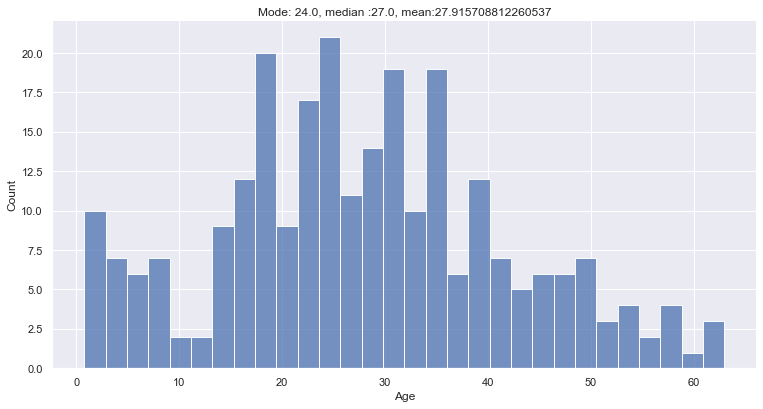

In [21]:
#Age and Sex: female
t = train[train.Sex == "female"]
g = sns.displot(t, x= "Age", bins = 30)
g.fig.set_figwidth(12)
g.fig.set_figheight(5.7)
plt.title("Mode: {}, median :{}, mean:{}".format(t.Age.mode()[0], t.Age.median(), t.Age.mean()))
plt.show()


In [22]:
##ANALYSIS:
# Male: Symetric distribution with right skewness. More disperse ages, with typical value of 19
#Female: Symetric distribution with right skewness.Les disperse than men, with typical value of 24 years old

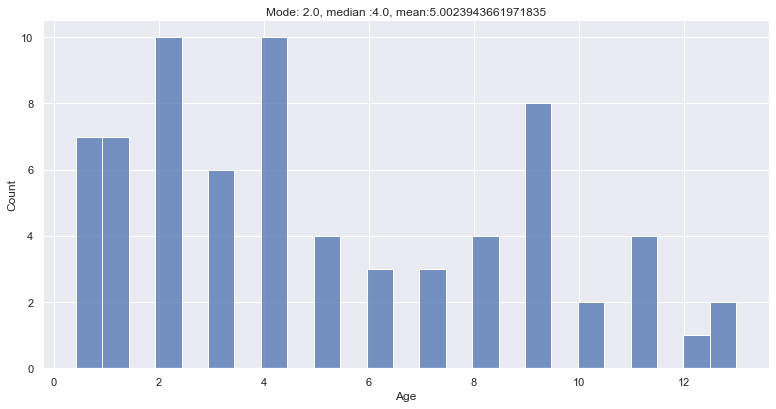

In [23]:
#Revisemos además los valores de la izquierda, correspondientes a los menores:
children = train[train.Age <14]
g = sns.displot(children, x= "Age", bins = 25)
g.fig.set_figwidth(12)
g.fig.set_figheight(5.7)
plt.title("Mode: {}, median :{}, mean:{}".format(children.Age.mode()[0], children.Age.median(), children.Age.mean()))
plt.show()

In [24]:
#Niños: distribución
#Valor típico:mode: 2 años
#Distribución trimodal, con peaks en 2,4, y 9 años como los más frecuentes valores
#Valores dispersos


Text(0.5, 1.0, 'Survived: 0.38% survived')

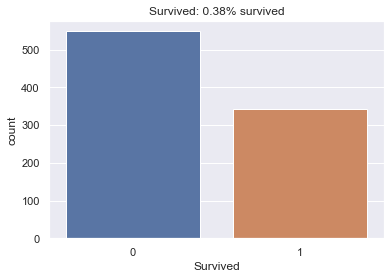

In [25]:
#2. DISCRETE FEATURES
#num_discrete = ['PassengerId', 'Survived', 'Pclass', 'SibSp','Parch']

#Here I can use the countplot (barplot) to check the distribution

#SURVIVED
g = sns.countplot(x= "Survived" ,data= train)
plt.title("{}: {}% survived".format("Survived", np.round(train[train.Survived == 1].shape[0]/ train.shape[0], 2)))

    

3   0.5511
1   0.2424
2   0.2065
Name: Pclass, dtype: float64

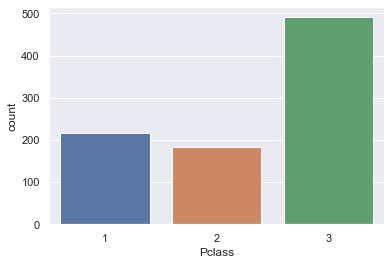

In [26]:
#Pclass
g = sns.countplot(x= "Pclass" ,data= train)
train.Pclass.value_counts(normalize = True)

0   0.6824
1   0.2346
2   0.0314
4   0.0202
3   0.0180
8   0.0079
5   0.0056
Name: SibSp, dtype: float64

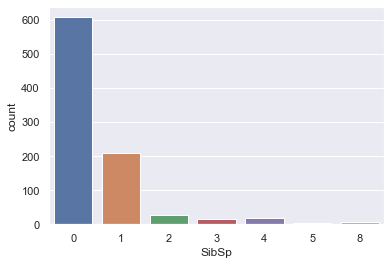

In [27]:
#Mas de la mitad de la gente estaba en la 3ra clase


#SibSp
g = sns.countplot(x= "SibSp" ,data= train)
train.SibSp.value_counts(normalize = True)

In [28]:
#La mayoria de la gente (91%) viajaba sin esposas/hermanos o a lo más declaraba 1

0   0.7609
1   0.1324
2   0.0898
5   0.0056
3   0.0056
4   0.0045
6   0.0011
Name: Parch, dtype: float64

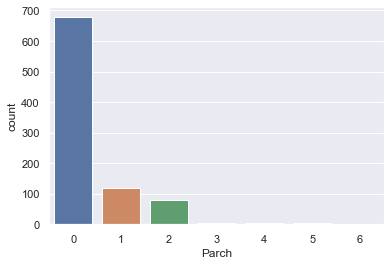

In [29]:
#Parch
#Parch
g = sns.countplot(x= "Parch" ,data= train)
train.Parch.value_counts(normalize = True)

In [30]:
#Mayoritariamente vemos viajando gente con a lo más 1 padre/niño (76% declara 0)

In [31]:
##Importante: vemos que podría establecerse una categoría GRUPO FAMILIAR = Persona + Sibsp + Parch para cada pasajero

In [32]:
t2 = train.copy()
t2["Family"] = t2["Parch"] * t2["SibSp"] 
data_summary(df = t2.select_dtypes(include = "number"), target = "Survived")

,Dtype,Uniques,Nulls,% Nulls,Skew,Kurtosis,Correlation
Survived,int64,2,0,0.0000,0.4790,-1.7750,1.0000
Pclass,int64,3,0,0.0000,-0.6310,-1.2800,-0.3380
Fare,float64,248,0,0.0000,4.7870,33.3980,0.2570
Parch,int64,7,0,0.0000,2.7490,9.7780,0.0820
Age,float64,88,177,0.2000,0.3890,0.1780,-0.0770
Family,int64,10,0,0.0000,5.2360,32.0590,-0.0770
SibSp,int64,7,0,0.0000,3.6950,17.8800,-0.0350
PassengerId,int64,891,0,0.0000,0.0000,-1.2000,-0.0050


In [33]:
#En principio la correlación obtenida con target no es mejor que la de Parch

In [34]:
#Revisemos el resto de las variables, que son categoricas

categ_nominal = ['Sex', "Name",'Ticket', 'Cabin', 'Embarked']

male     0.6476
female   0.3524
Name: Sex, dtype: float64

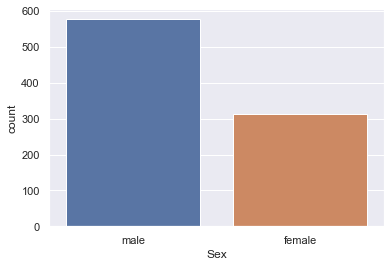

In [35]:
#Sex
g = sns.countplot(x= "Sex" ,data= train)
train.Sex.value_counts(normalize = True)

In [36]:
# 2/3 de los pasajeros eran de sexo masculino

S   0.7244
C   0.1890
Q   0.0866
Name: Embarked, dtype: float64

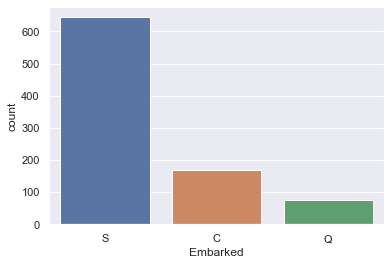

In [37]:
#Embarked
g = sns.countplot(x= "Embarked" ,data= train)
train.Embarked.value_counts(normalize = True)

In [38]:
# Más del 72% de la gente se embarcó desde S

In [39]:
#Cabin, ticket y name los dejaré para revisarlos más adelante


In [40]:
#RESUMEN OBSERVACIONES UNIVARIATE ANALYSIS

#We see outliers in Age and Fare, that are worthwhile to check and see if they can be treated
##Mayoritariamente vemos viajando gente con a lo más 1 padre/niño (76% declara 0) (Parch)
##Importante: vemos que podría establecerse una categoría GRUPO FAMILIAR = Persona + Sibsp + Parch para cada pasajero
#Mas de la mitad de la gente estaba en la 3ra clase
#Distribución trimodal DE NIÑOS, con peaks en 2,4, y 9 años como los más frecuentes valores
# 2/3 de los pasajeros eran de sexo masculino
# Más del 72% de la gente se embarcó desde S
#Edad típica de hombres menor que mujeres y con mayor dispersión (0-80 versus 0-65 aprox)




In [41]:
#BIVARIATE ANALYSIS: Check the relationships of the features with the target variable

#Summary:
num_discrete = ['PassengerId', 'Survived', 'Pclass', 'SibSp',
       'Parch']
num_continuous = ['Age',  'Fare']
categ_nominal = ['Sex', "Name",'Ticket', 'Cabin', 'Embarked']

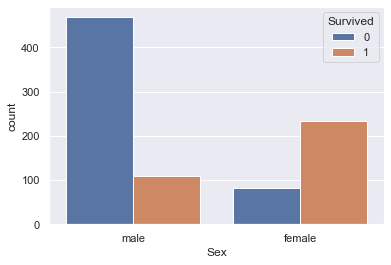

In [42]:
#SEX/SURVIVED

#General view
g = sns.countplot(x= "Sex" ,data= train, hue = "Survived")



In [43]:
train[(train.Sex == "male")].Survived.value_counts(normalize = True)


0   0.8111
1   0.1889
Name: Survived, dtype: float64

In [44]:
train[(train.Sex == "female")].Survived.value_counts(normalize = True)


1   0.7420
0   0.2580
Name: Survived, dtype: float64

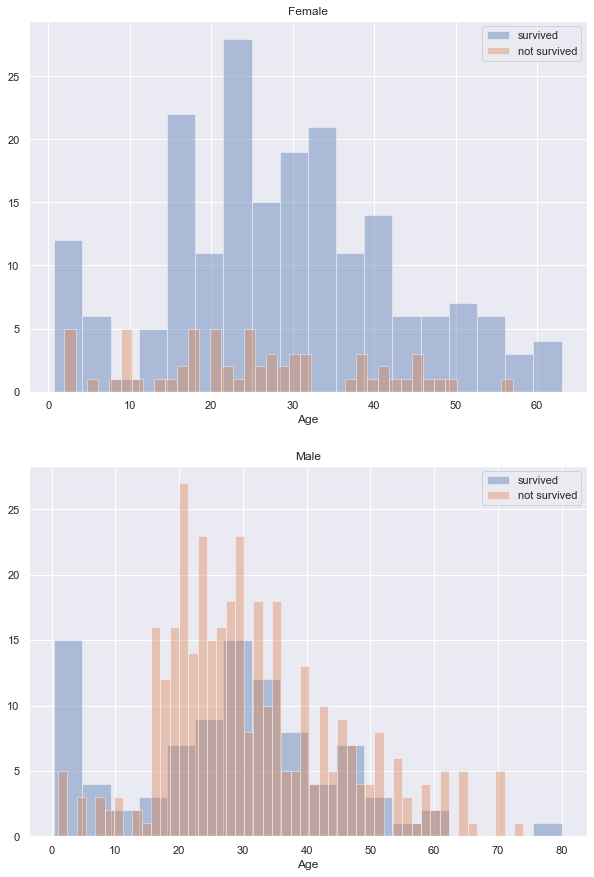

In [45]:
#Let´s look into the distribution of sex/survival/age
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10, 15))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=50, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')



In [46]:
print(women[women['Survived']==1].Age.mode()[0])


24.0


In [47]:
#Mujeres: mayor prob surv. entre 15 y 35 años. Mayor dispersión de edades de supervivientes que de fallecidos
#Mujeres: fallecidas curva asimetrica con multiples valores tipicos, pero que no superan fecuencias de 5 en cada caso
#Hombres: Fallecidos muestra curva right- skew con dispersión importante de edades. Mayor cantidad de fallecidos entre
#los 17 y 35 años aproximadamente
#Hombres sobrevivientes: Entre los 18 y 40 años mayor probabilidad de supervivencia, Entre 60 y 75 no hay chance (pero si en mujeres). 
#Hombres: valor típico de supervivencia niños 0-5 años

#Puede ser interesante generar bins de edades para ver su correlación, ya que se ven claramente rangos másmenos expuestos

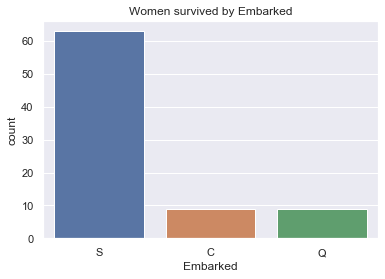

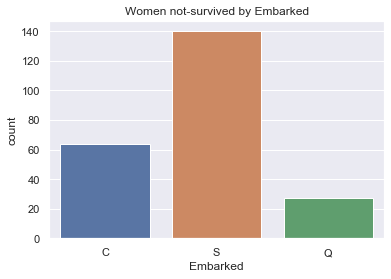

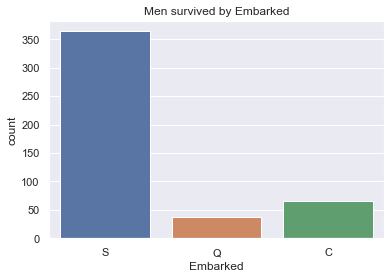

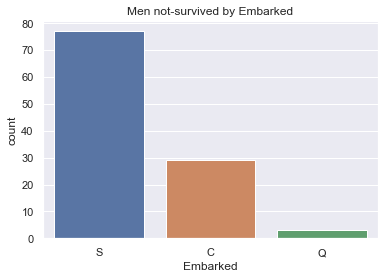

In [48]:
##distribution of sex/survival/Embarked
survived = 'survived'
not_survived = 'not survived'
# fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(10, 15))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']

g = sns.countplot(x= "Embarked",data= women[women['Survived']== 0])
g.set_title("Women survived by Embarked")
plt.show()
g = sns.countplot(x= "Embarked",data= women[women['Survived']== 1])
g.set_title("Women not-survived by Embarked")

plt.show()
g = sns.countplot(x= "Embarked",data= men[men['Survived']== 0])
g.set_title("Men survived by Embarked")

plt.show()
g = sns.countplot(x= "Embarked",data= men[men['Survived']== 1])
g.set_title("Men not-survived by Embarked")

plt.show()





In [49]:
#Análisis porcentual de cada caso:
#Se calcula que S = 31% mujeres fallecidas, Q = 25% y C = 12,3%
women[women.Survived == 1].groupby(["Embarked"]).Survived.count() 

Embarked
C    64 
Q    27 
S    140
Name: Survived, dtype: int64

In [50]:
#Análisis porcentual de cada caso:
#Se calcula que S = 82,5% hombres fallecidos, Q = 92% y C = 69%
men[men.Survived == 1].groupby(["Embarked"]).Survived.count() 

Embarked
C    29
Q    3 
S    77
Name: Survived, dtype: int64

In [51]:
#Notable es que el menor % de fallecidos tanto en hombres como mujeres se ve en los que se embarcaron en C. Por qué?

#Podemos crear un feature = EMBARKED+ _+ SEX (correlación con target de -0.37)

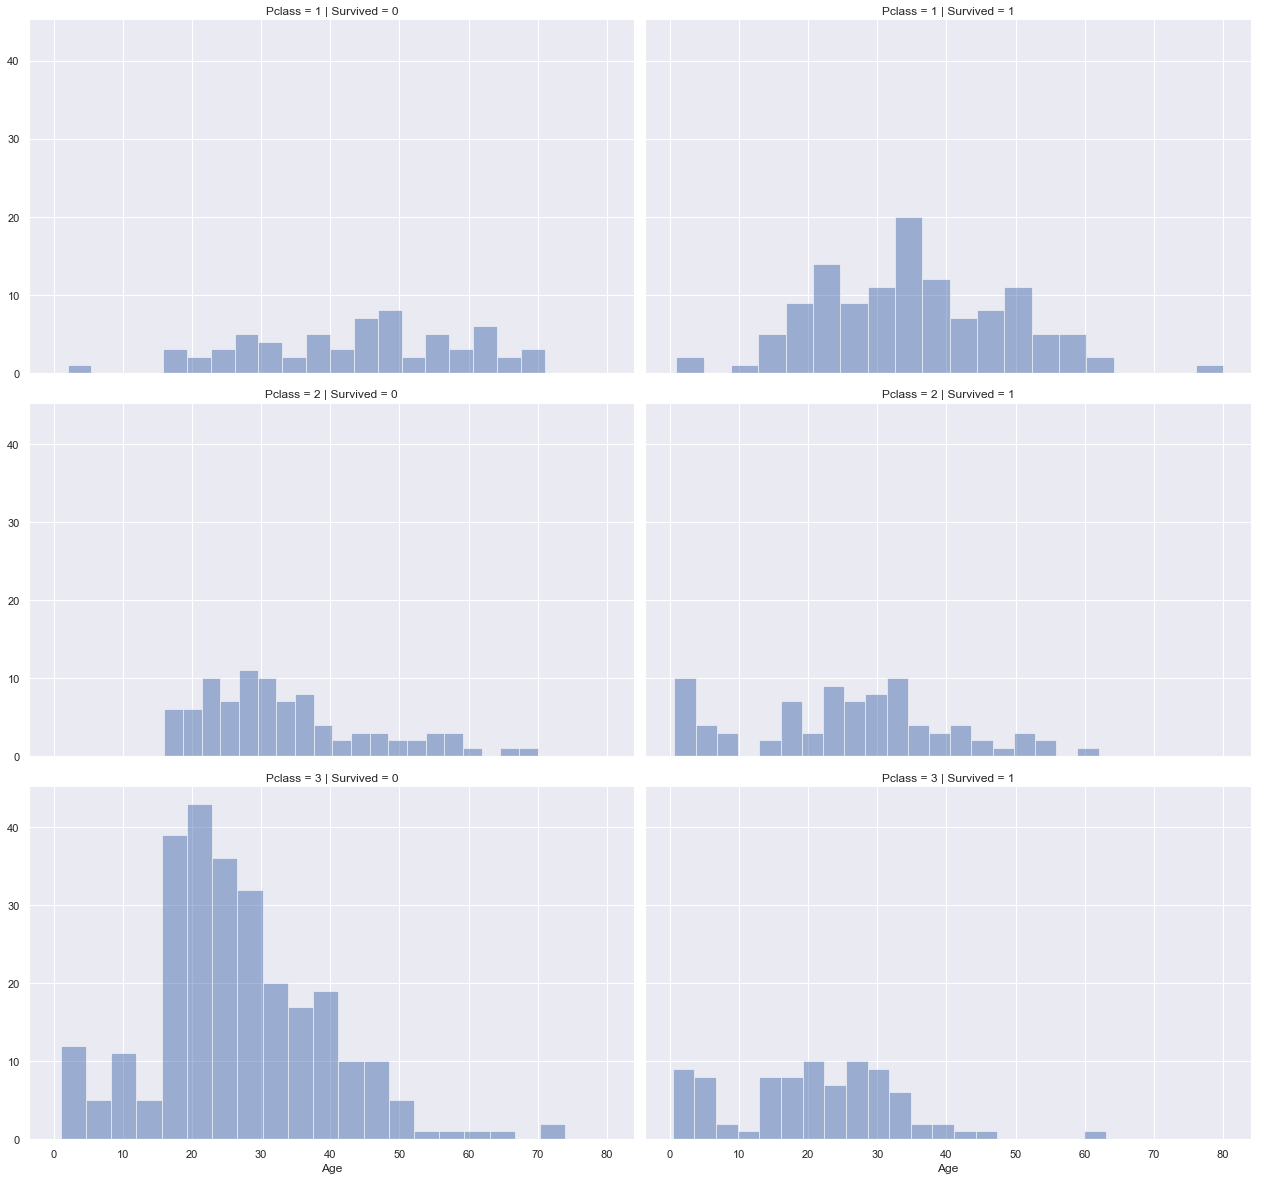

In [52]:
#3.PCLASS
#Veamos la distribución de edades de sobrevivientes/no sobrevivientes según Pclass 

grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=5.5, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


##Se aprecia la mayor dispersión y cantidad de personas fallecidas en la 3ra clase

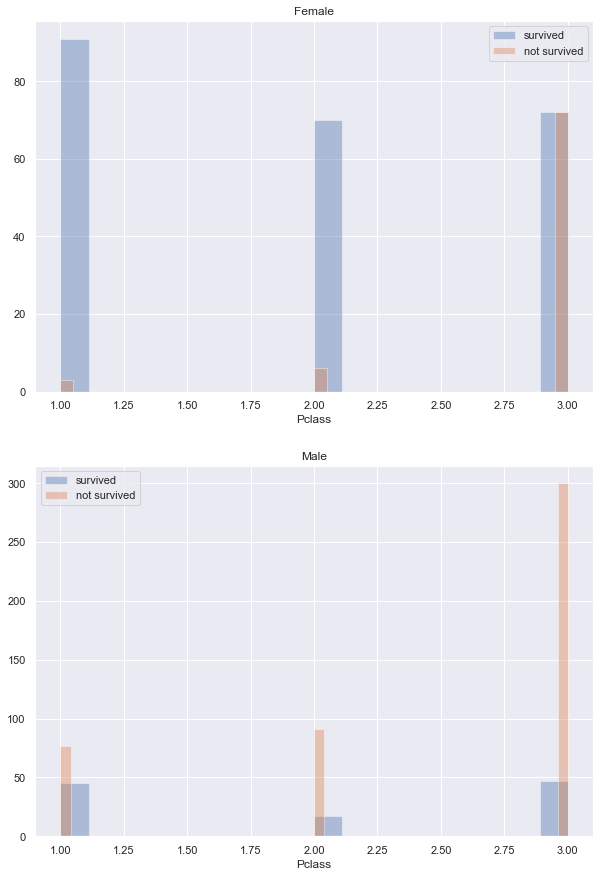

In [53]:
#cHECKING PCLASS, SEX, SURVIVED

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10, 15))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Pclass.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Pclass.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Pclass.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Pclass.dropna(), bins=50, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


In [54]:
##Claramente las mayores pprobabilidades de supervivencia de mujeres son en 1ra y 2da clase. En 3ra es de 50%
#La mayor probabilidad de fallecimiento de hombres está en 3ra clase 

#INTERESANTE CREAR UN NUEVO FEATURE PCLASS +"_"+SEX

In [55]:
#CODE FOR ENGINEERING A NEW CATEGORICAL FEATURE 
# t = train.copy()
# t["port_sex"] = t.Pclass.astype("str") +"_"+ t.Sex.astype("str")
# t.port_sex = t.groupby(["port_sex"])["PassengerId"].transform("count")

In [56]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

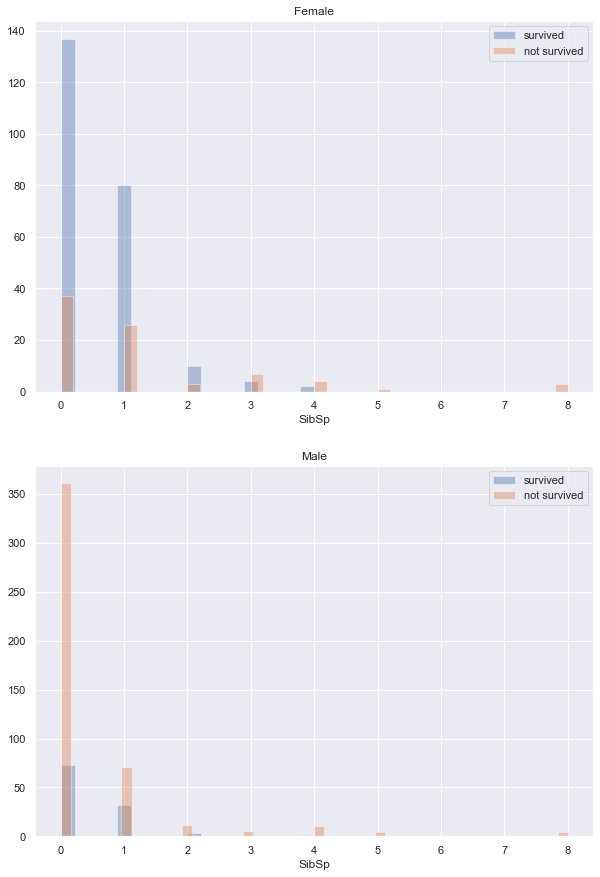

In [57]:
#Sex/Sibsp/Survived

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10, 15))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].SibSp.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].SibSp.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].SibSp.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].SibSp.dropna(), bins=50, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [58]:
#Vemos que las mujeres con 0 ó 1 SibSp tienen mayores probabilidades de sobrevivir. A partir de 5 ya no lo logran
#Igualmente los hombres, aunque con muchos menos sobrevivientes. Hay correlación aparente ahí
#INTERESANTE CREAR UN NUEVO FEATURE CON SIBSP+SEX: tiene un corr de -0.35

In [59]:
t = train.copy()
t["port_sex"] = t.SibSp.astype("str") +"_"+ t.Sex.astype("str")
t.port_sex = t.groupby(["port_sex"])["PassengerId"].transform("count")
t.port_sex.corr(t.Survived)

-0.3524126685756483

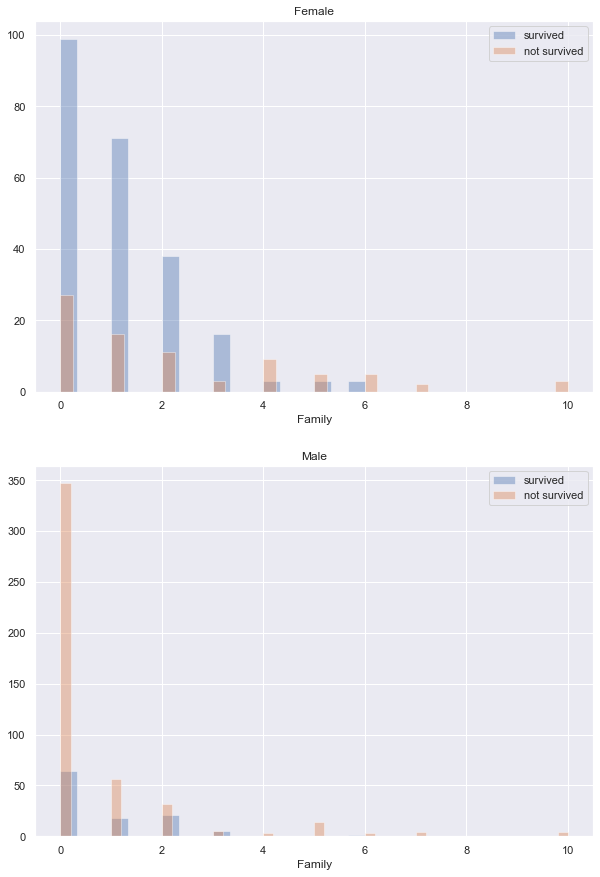

In [60]:
#Agreguemos una variante estudiando un feature de familiy = Parch + SibSp
t = train.copy()
t["Family"] = t["SibSp"] + t["Parch"]

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10, 15))
women = t[t['Sex']=='female']
men = t[t['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Family.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Family.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Family.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Family.dropna(), bins=50, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [61]:
#Se repite la tendencia
#INTERESANTE CREAR UN FEATURE FAMILY = SIBSP + PARCH

In [62]:
#Dropping passengerId, ya que no aporta 
train.PassengerId.corr(train.Survived)

-0.005006660767066487

In [63]:
train.drop("PassengerId", axis =1, inplace = True)
test.drop("PassengerId", axis =1, inplace = True)
df.drop("PassengerId", axis =1, inplace = True)

In [64]:
##WORK WITH NULLS AND MISSING DATA
nulls_summary(df)

,Total,%
Cabin,1014,77.5000
Age,263,20.1000
Embarked,2,0.2000
Fare,1,0.1000


In [65]:
#NULLS IN CABIN
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [66]:
##En el barco había 8 decks, cada uno con una letra . La cabina comenzaba por el deck correspondiente
##Por eso es posible hacer un nuevo feature que asigne el deck correspondiente a cada persona
#Se armará un feature llamado Deck, en base a la letra de cada deck, que luego se convierte en int
#Los nan quedarán como 0

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
df['Cabin'] = df['Cabin'].fillna("U0") #antes se rellenan los nan con U0 para que no molesten
df['Deck'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group()) #extrae la letra del Cabin
df['Deck'] = df['Deck'].map(deck)
df['Deck'] = df['Deck'].fillna(0)
df['Deck'] = df['Deck'].astype(int)

In [67]:
df[df["Survived"] !=-1].Deck.corr(df[df["Survived"] !=-1].Survived) #igual sirve porque tiene buena correlación con target

-0.28956939861832787

In [68]:
#Se elimina Cabin y se actualizan df, train y test
df.drop(["Cabin"], axis =1, inplace = True)
train = df[df["Survived"] !=-1]
test = df[df["Survived"] ==-1]

In [69]:
###NULLS IN AGE
#Hay 263 nulls en total para el feature Age

#TRUCO CHINO: Probaré un truco consistente en calcular el mean de Age del train set, el std delAge del test set y reemplazar
#todos los valores nan de Age con números random generados a +- 1 std del mean
#Nota:uso el mean como valor típico dado que Age tiene una distribución bastante simétrica (ver statistics with Jim)

data = [train, test]

for dataset in data:
    mean = train.Age.mean()
    std = test.Age.std()
    nr_nulls = dataset.Age.isnull().sum() #nro de nulls de Age en cada set
    #genero los nros random de enteros según la regla
    rand_age = np.random.randint(mean-std, mean + std, size = nr_nulls)
    #Fill de Nan
    age_slice = dataset.Age.copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset.Age = age_slice
    dataset.Age = dataset.Age.astype(int)
    
        

In [70]:
#Vuelvo a unir train y test en df
df = pd.concat([train, test], axis = 0).reset_index(drop = True)

In [71]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    2
Deck        0
dtype: int64

In [72]:
#EMBARKED
#Como embarked tiene solo 2 valores nan, hago fill con su valor tipico
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [73]:
df.Embarked = df.Embarked.fillna("S")

In [74]:
#Fare
#Segun Jim, dado que Fare tiene una distribución con skewed y es un dato continuo, reemplazo con la mediana
df.Fare = df.Fare.fillna(df.Fare.median())

In [75]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Deck        0
dtype: int64

In [76]:
#Ahora que imputé todos los nulls, actualizo train y test
train = df[df["Survived"] !=-1]
test = df[df["Survived"] ==-1]

In [77]:
#OUTLIERS!!!!!
#Treebased models are robust to outliers, so we won´t them in this project
#Source: https://www.quora.com/Why-are-tree-based-models-robust-to-outliers


In [78]:
##CONVERT AND ENCODE DATA 

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Survived    1309 non-null int64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1309 non-null int64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1309 non-null float64
Embarked    1309 non-null object
Deck        1309 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 112.6+ KB


In [80]:
##CUANDO USAR LabelEncoding:
#De acuerdo al libro de Abishek, se puede usar en todos los Tree based models (dt, rf, extra trees) o bien
# en todos los boosted trees models (xgboost, GBM, lightGBM)
#NO USAR EN LINEAR MODELS, SVM O EN NN, DADO QUE ELLOS NECESITAN CONSUMIR LOS DATOS NORMALIZADOS O ESTANDARIZADOS

In [81]:
#Como acá vamos a trabajar con tree-based y boosted trees, así que podemos usar el LabelEncoding sin problemas

In [82]:
##CONVERTIR DATA TYPES Y ENCODING
#Convert Fare from float to int
df.Fare = df.Fare.astype("int")


In [83]:
#Convert Sex
dict = {"male": 0, "female":1}

df.Sex =  df.Sex.map(dict)

In [84]:
#Convert Embarked
#Usaremos label encoding
dict = {"S": 0, "C": 1, "Q": 2}

df.Embarked =  df.Embarked.map(dict)


In [85]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38,1,0,PC 17599,71,1,3
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,0,3
4,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,0,8


In [86]:
#Ticket
df.Ticket.value_counts(normalize= True)

CA. 2343            0.0084
CA 2144             0.0061
1601                0.0061
347082              0.0053
347077              0.0053
                     ...  
349226              0.0008
SC/PARIS 2149       0.0008
SOTON/O.Q. 392078   0.0008
342826              0.0008
14973               0.0008
Name: Ticket, Length: 929, dtype: float64

In [87]:
#Hay demasiados valores unicos como para que valga la pena convertirlos,d e manera que los eliminamos
ticket_backup = df.Ticket #respaldo
df.drop(["Ticket"], axis =1, inplace = True)

In [88]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38,1,0,71,1,3
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,3
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,8


In [89]:
#Name
#Se crea un nuevo feature llamado title, extrayendo los títulos de cada pasajero y transformándolos encategorías
#Luego se mapea cada categoría con un int para transformarla en numérica con LabelEncoding


df["Title"] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)# extraen los str que terminen en un punto
#Reemplazo los menor frecuentes con un "Rare"
df.Title = df.Title.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
#Ajusto y reemplazo mme, ms, me con Miss y Mrs
df.Title = df.Title.replace(["Ms", "Mlle"], "Miss")
df.Title = df.Title.replace("Mme", "Mrs")

#Mapeamos para hacer un LabelEncoding
dict = {'Mr':1, 'Miss':2,'Mrs':3,  'Master':4, 'Rare':5}
df.Title = df.Title.map(dict)
#Por si acaso se rellena cualquier nan con 0
df.Title = df.Title.fillna(0)

#Ahora elimino Name
df.drop("Name", axis = 1, inplace = True)
#Actualizo train y test
train = df[df["Survived"] !=-1]
test = df[df["Survived"] ==-1]


In [90]:

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7,0,8,1
1,1,1,1,38,1,0,71,1,3,3
2,1,3,1,26,0,0,7,0,8,2
3,1,1,1,35,1,0,53,0,3,3
4,0,3,0,35,0,0,8,0,8,1


In [91]:
#Hagamos un primer test del output del EDA
train.to_csv("../input/train_1.csv", index = False)

In [92]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7,0,8,1
1,1,1,1,38,1,0,71,1,3,3
2,1,3,1,26,0,0,7,0,8,2
3,1,1,1,35,1,0,53,0,3,3
4,0,3,0,35,0,0,8,0,8,1


In [93]:
train.iloc[:5, 0]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [94]:
df.loc[:, "Survived"].values

array([ 0,  1,  1, ..., -1, -1, -1])

In [95]:
###FEATURE ENGINEERING
#LAB EXPERIMENT: WE WILL CREATE AS MUCH FEATURES AS WE CAN AND LET DE EATURE IMPORTANCE DECIDE which ones are the best
##NEW FEATURES:
# GRUPO FAMILIAR = Persona + Sibsp + Parch para cada pasajero
# #Podemos crear un feature = EMBARKED+ _+ SEX (correlación con target de -0.37)
# #INTERESANTE CREAR UN NUEVO FEATURE PCLASS +"_"+SEX
# INTERESANTE CREAR UN NUEVO FEATURE CON SIBSP+SEX: tiene un corr de -0.35


In [96]:
#1. Family
df.Family = 1 + df.SibSp + df.Parch

In [97]:
#SibSp+Sex (usamos la técnica de Abishek: unimos primero como caregoricas, luego sacamos sus frcuencias y a cada
#una se le asigna la frecuencia)
df["port_sex"] = df.SibSp.astype("str") +"_"+ df.Sex.astype("str")
df.port_sex = df.groupby(["port_sex"])["Deck"].transform("count")


In [98]:
#Pclass+Sex (usamos la técnica de Abishek: unimos primero como caregoricas, luego sacamos sus frcuencias y a cada
#una se le asigna la frecuencia)
df["port_sex"] = df.Pclass.astype("str") +"_"+ df.Sex.astype("str")
df.port_sex = df.groupby(["port_sex"])["Deck"].transform("count")


In [99]:
#Embarked+Sex (usamos la técnica de Abishek: unimos primero como caregoricas, luego sacamos sus frcuencias y a cada
#una se le asigna la frecuencia)
df["port_sex"] = df.Embarked.astype("str") +"_"+ df.Sex.astype("str")
df.port_sex = df.groupby(["port_sex"])["Deck"].transform("count")


In [100]:
#Otros features:

In [101]:
#Age*Pclass
df.AgeClass = df.Age * df.Pclass


In [102]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,port_sex
0,0,3,0,22,1,0,7,0,8,1,623
1,1,1,1,38,1,0,71,1,3,3,113
2,1,3,1,26,0,0,7,0,8,2,293
3,1,1,1,35,1,0,53,0,3,3,293
4,0,3,0,35,0,0,8,0,8,1,623


In [103]:
#Actualizo los datasets
train = df[df["Survived"] !=-1]
test = df[df["Survived"] ==-1]

In [104]:
%store train
%store test

Stored 'train' (DataFrame)
Stored 'test' (DataFrame)


In [105]:
##Let´s check...
#Hasta el momento (14/11): mejor accuracy 0.78947 usando GradientBoosting y los features. Lugar 1.600
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck', 'Title', 'port_sex'],
      dtype='object')

In [106]:
#Nexto to work on: Ensemble learning and new features

In [107]:
int(0.65 + 0.1)

0

In [108]:
df.Survived.mean()

-0.058059587471352175

In [109]:
# NEW FEATURES (22/11/2020)
#url: https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial

In [110]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,port_sex
0,0,3,0,22,1,0,7,0,8,1,623
1,1,1,1,38,1,0,71,1,3,3,113
2,1,3,1,26,0,0,7,0,8,2,293
3,1,1,1,35,1,0,53,0,3,3,293
4,0,3,0,35,0,0,8,0,8,1,623


In [111]:
new_feats= df.copy()

In [112]:
#FARE binning
#Convertir a bins los rangos de fare
new_feats['rank'] = new_feats['Fare'].rank(method='first')

new_feats['Fare'] = pd.qcut(new_feats["rank"].values, 13).codes

In [113]:
new_feats.drop("rank", axis = 1, inplace = True)

In [114]:
##AGE BINNING
new_feats['rank'] = new_feats['Age'].rank(method='first')
new_feats['Age_bin'] = pd.qcut(new_feats["rank"].values, 10).codes
new_feats.drop("rank", axis = 1, inplace = True)



In [115]:
##Family size
new_feats["FamilySize"] = 1 + new_feats.SibSp + new_feats.Parch

#Family Size with 1 are labeled as Alone
#Family Size with 2, 3 and 4 are labeled as Small
#Family Size with 5 and 6 are labeled as Medium
#Family Size with 7, 8 and 11 are labeled as Large


def assign(s):
    if s ==1:
        s = "Alone"
    elif 2<= s <=4:
        s = "Small"
    elif 5<= s <= 6:
        s= "Medium"
    elif 7<= s <= 11:
        s ="Large"
    return s
        


new_feats.FamilySize = new_feats.FamilySize.apply(assign)


In [116]:
#Le aplico el método de Abihsek para que se convierta en frecuencias

new_feats.FamilySize = new_feats.groupby(["FamilySize"])["Deck"].transform("count")

In [117]:
new_feats.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,port_sex,Age_bin,FamilySize
0,0,3,0,22,1,0,0,0,8,1,623,2,437
1,1,1,1,38,1,0,11,1,3,3,113,7,437
2,1,3,1,26,0,0,0,0,8,2,293,4,790
3,1,1,1,35,1,0,10,0,3,3,293,6,437
4,0,3,0,35,0,0,3,0,8,1,623,6,790


In [118]:
new_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Survived      1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null int64
Age           1309 non-null int64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Fare          1309 non-null int8
Embarked      1309 non-null int64
Deck          1309 non-null int64
Title         1309 non-null int64
port_sex      1309 non-null int64
Age_bin       1309 non-null int8
FamilySize    1309 non-null int64
dtypes: int64(11), int8(2)
memory usage: 115.2 KB


In [119]:
new_feats.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,port_sex,Age_bin,FamilySize
0,0,3,0,22,1,0,0,0,8,1,623,2,437
1,1,1,1,38,1,0,11,1,3,3,113,7,437
2,1,3,1,26,0,0,0,0,8,2,293,4,790
3,1,1,1,35,1,0,10,0,3,3,293,6,437
4,0,3,0,35,0,0,3,0,8,1,623,6,790


In [124]:
###Ticket frquency
new_feats["Ticket"] = ticket_backup
new_feats["Ticket_freq"] = new_feats.groupby("Ticket")["Ticket"].transform("count")

In [125]:
new_feats.Ticket_freq

0       1
1       2
2       1
3       2
4       1
       ..
1304    1
1305    3
1306    1
1307    1
1308    3
Name: Ticket, Length: 1309, dtype: int64

In [126]:
new_feats.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck', 'Title', 'port_sex', 'Age_bin', 'FamilySize',
       'Ticket', 'Ticket_freq'],
      dtype='object')

In [127]:
new_feats = new_feats[['Age_bin', 'FamilySize', 'Ticket_freq']] ##version final new feats

In [129]:
#Concatenar y crear nuevo datset 
df2 = pd.concat((df,new_feats), axis = 1)
df2.drop("Age", axis = 1, inplace = True)

In [130]:
df2.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Deck,Title,port_sex,Age_bin,FamilySize,Ticket_freq
0,0,3,0,1,0,7,0,8,1,623,2,437,1
1,1,1,1,1,0,71,1,3,3,113,7,437,2
2,1,3,1,0,0,7,0,8,2,293,4,790,1
3,1,1,1,1,0,53,0,3,3,293,6,437,2
4,0,3,0,0,0,8,0,8,1,623,6,790,1


In [131]:
##Nuevos train y test
train2 = df2[df2.Survived!= -1]
test2 = df2[df2.Survived == -1]

In [134]:
%store train2
%store test2

Stored 'train2' (DataFrame)
Stored 'test2' (DataFrame)
